In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Nov 22 measurements

In [ ]:
# Plotting function


# Function to calculate distortion and propagate uncertainty
def calculate_distortion(data, error):
    reference = data[0]  # First value is the reference magnification
    distortion = (data - reference) / reference * 100  # Distortion formula
    distortion_error = error / reference * 100  # Propagate uncertainty
    return distortion, distortion_error


def plot(groups, title):
    # Plot each group individually
    plt.figure(figsize=(8, 5))

    for data, error, label, marker in groups:
        x = np.arange(1, len(data) + 1)  # Create x-values matching the data indices
        distortion, distortion_error = calculate_distortion(data, error)

        # Interpolation for smooth curve
        x_smooth = np.linspace(x.min(), x.max(), 500)  # Generate fine x-axis
        distortion_smooth = make_interp_spline(x, distortion)(x_smooth)

        plt.errorbar(
            x, distortion, yerr=distortion_error, fmt=marker, label=label, capsize=5
        )
        # plt.plot(
        #     x_smooth,
        #     distortion_smooth,
        #     color="k",
        #     linewidth=1,
        #     alpha=0.2,
        # )
        plt.axhline(
            0, color="gray", linestyle="--", linewidth=1
        )  # Add a horizontal line at 0
    plt.xlabel("Position [mm]")
    plt.ylabel("Distortion [%]")
    plt.ylim(-30, 80)
    plt.title(f"{title}")
    plt.grid()
    plt.legend()
    plt.show()

In [117]:
first = np.array([1.4, 1.512, 1.652, 1.66])
ufirst = np.array([0.1, 0.02, 0.03, 0.04])

second = np.array([1.8, 1.59, 1.632, 1.663, 1.942, 1.995, 2.699, 2.7, 3.66])

usecond = np.array([0.1, 0.02, 0.11, 0.06, 0.05, 0.06, 0.08, 0.1, 0.02])

third = np.array([1.677, 1.495, 1.559, 1.589, 1.766, 2.554])

uthird = np.array([0.03, 0.05, 0.05, 0.04, 0.09, 0.2])

fourth = np.array([1.772, 1.64, 1.559, 1.811])
ufourth = np.array([0.04, 0.04, 0.08, 0.02])

In [118]:
fifth = np.array([1.5, 1.56, 1.59, 1.61, 1.87])
ufifth = np.array([0.05, 0.03, 0.06, 0.08, 0.06])

sixth = np.array([1.583, 1.56, 1.45, 1.71, 1.8, 2.17, 2.17, 2.24])
usixth = np.array([0.03, 0.03, 0.05, 0.08, 0.03, 0.04, 0.07, 0.06])

seventh = np.array([1.912, 1.734, 1.91, 2.1, 2.11])

useventh = np.array([0.11, 0.01, 0.02, 0.1, 0.09])

In [119]:
eighth = np.array([1.83, 1.84, 1.83, 1.93, 2.07, 2.47, 2.42, 2.79])

ueighth = np.array([0.09, 0.1, 0.07, 0.04, 0.03, 0.04, 0.07, 0.06])

ninth = np.array([1.877, 1.936, 2.02, 2.1])
unnth = np.array([0.09, 0.06, 0.06, 0.1])


idea1 = np.array([1.75, 1.629, 1.69, 1.744])
uidea1 = np.array([0.03, 0.02, 0.05, 0.04])

idea2 = np.array([1.54, 1.49, 1.515, 1.52])
uidea2 = np.array([0.03, 0.05, 0.05, 0.02])


discover = np.array([1.718, 1.66, 1.663, 1.58, 1.52, 1.448])
udiscover = np.array([0.08, 0.04, 0.01, 0.06, 0.08, 0.04])

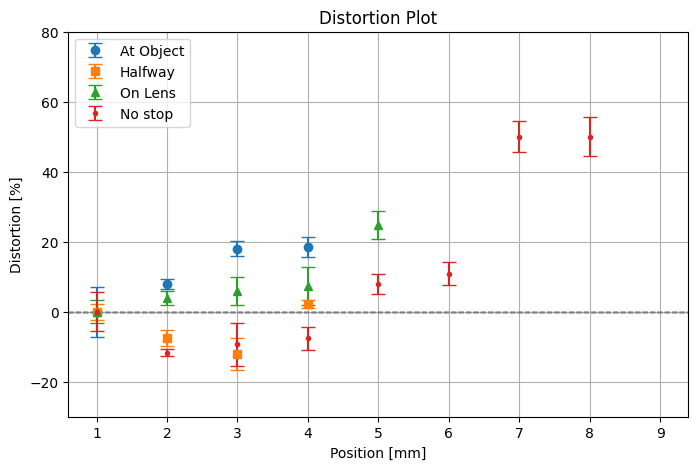

In [120]:
# Plot of small aperture at different pos

# Plot how size of aperture affects magnification
groups = [
    (first, ufirst, "At Object", "o"),
    (fourth, ufourth, "Halfway", "s"),
    (fifth, ufifth, "On Lens", "^"),
    (second, usecond, "No stop", "."),
]
plot(groups)

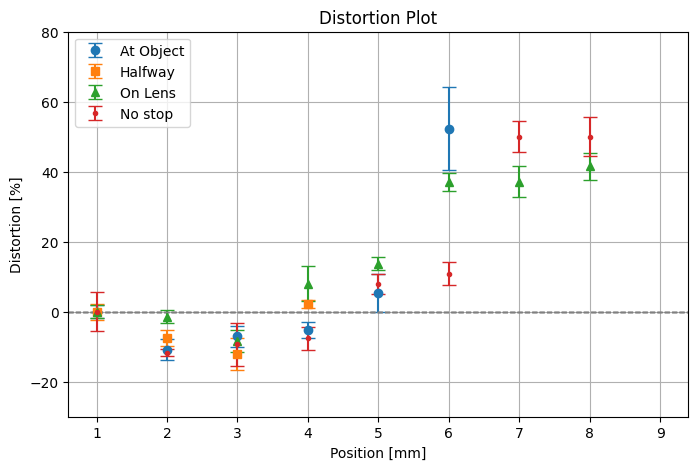

In [121]:
# Plot of large aperture at different pos

# Plot how size of aperture affects magnification
groups = [
    (third, uthird, "At Object", "o"),
    (fourth, ufourth, "Halfway", "s"),
    (sixth, usixth, "On Lens", "^"),
    (second, usecond, "No stop", "."),
]
plot(groups)

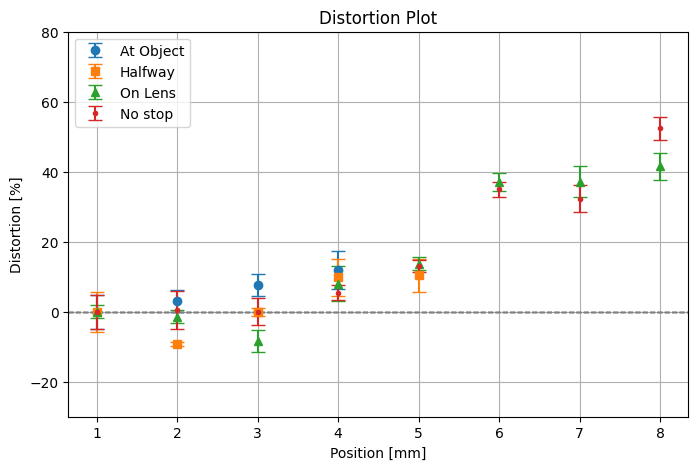

In [122]:
# Pincushion again, stops at diff pos

groups = [
    (ninth, unnth, "At Object", "o"),
    (seventh, useventh, "Halfway", "s"),
    (sixth, usixth, "On Lens", "^"),
    (eighth, ueighth, "No stop", "."),
]
plot(groups)

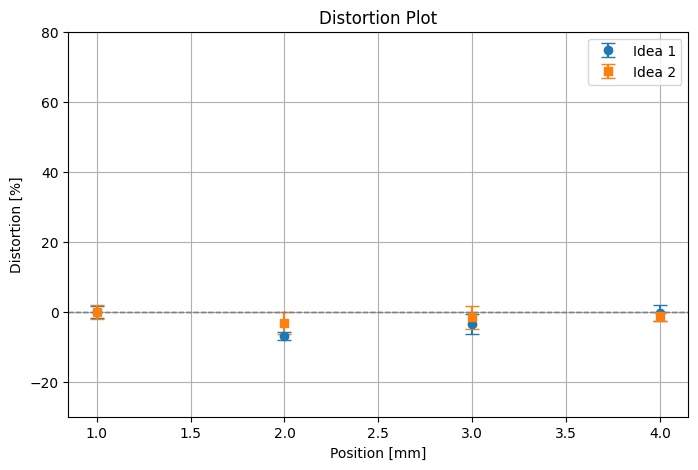

In [123]:
# Idea 1, Idea 2 to get no distortion

groups = [
    (idea1, uidea1, "Idea 1", "o"),
    (idea2, uidea2, "Idea 2", "s"),
]
plot(groups)

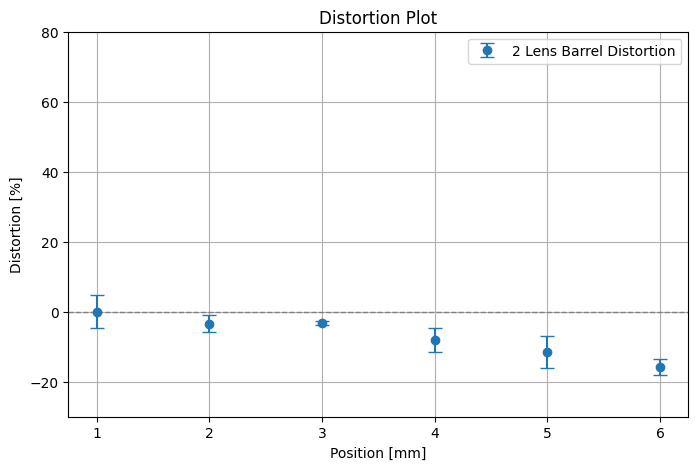

In [124]:
# Barrel Distortion with 2 lenses

groups = [
    (discover, udiscover, "2 Lens Barrel Distortion", "o"),
]
plot(groups)